In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('50_Startups.csv')

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
df.shape

(50, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [7]:
g = df.groupby('State')

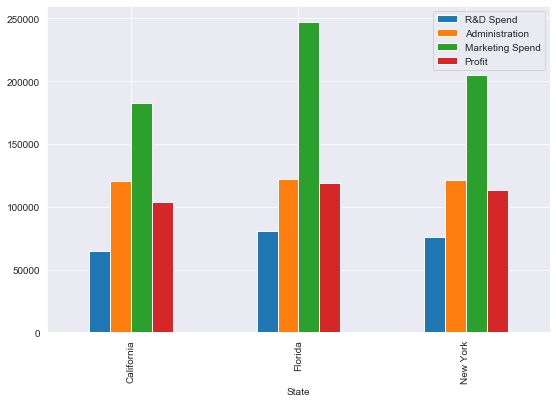

In [9]:
sns.set_style('darkgrid')
g.mean().plot(kind='bar',figsize=(9,6))

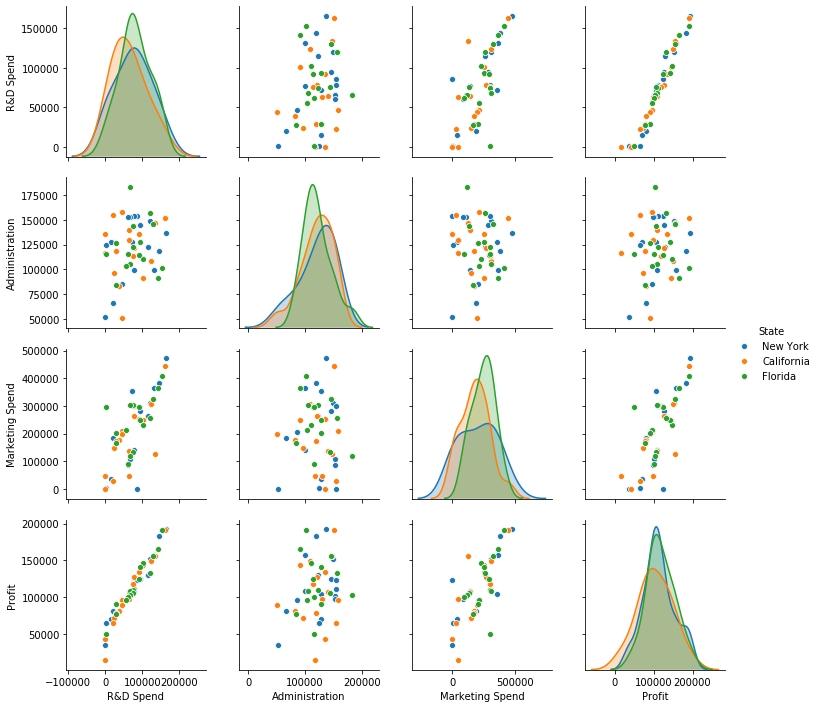

In [6]:
sns.pairplot(df, hue='State')

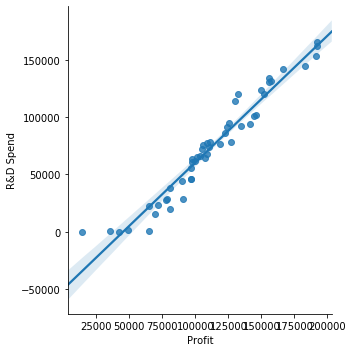

In [16]:
sns.lmplot(x='Profit', y='R&D Spend', data=df)

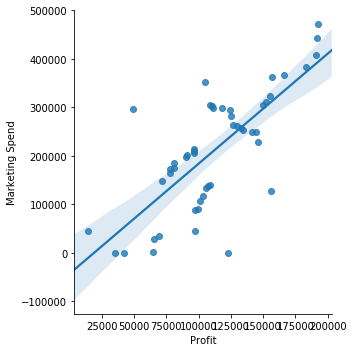

In [17]:
sns.lmplot(x='Profit', y='Marketing Spend', data=df)

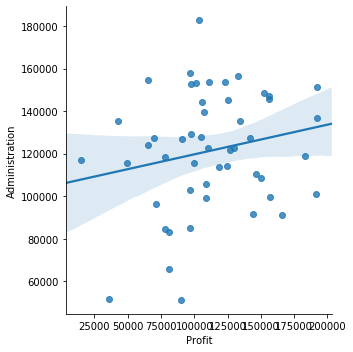

In [19]:
sns.lmplot(x='Profit', y='Administration', data=df)

In [20]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [10]:
x = df[['R&D Spend','Administration','Marketing Spend']]

In [17]:
y = df['Profit']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lm = LinearRegression()

In [34]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
print(lm.intercept_)

44203.26946443954


In [37]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
R&D Spend,0.813614
Administration,0.013227
Marketing Spend,0.034079


In [38]:
predictions = lm.predict(x_test)

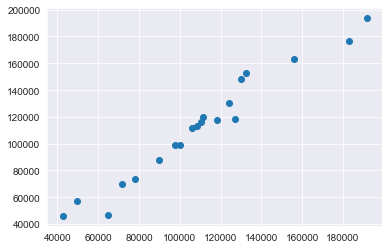

In [39]:
sns.set_style('darkgrid')
plt.scatter(y_test,predictions)

In [38]:
from sklearn import metrics

In [39]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 6733.384421932409
MSE: 77138060.17464074
RMSE: 8782.827572862896
